
# Regression

## Install packages

In [ ]:
import sys
!{sys.executable} -m pip install -r requirements.txt

In [12]:
import pandas as pd
import numpy as np
import os
import helper
import quiz_tests
import matplotlib.pyplot as plt

In [13]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

## Simulate two stock prices


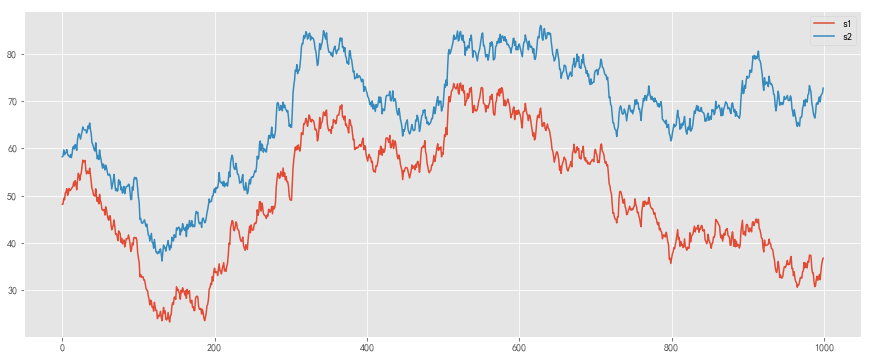

In [14]:
# just set the seed for the random number generator
np.random.seed(100)
# use returns to create a price series
drift = 100
r0 = pd.Series(np.random.normal(0, 1, 1000))
s0 = pd.Series(np.cumsum(r0), name='s0') + drift

noise1 = np.random.normal(0, 0.4, 1000)
drift1 = 50
r1 = r0 + noise1
s1 = pd.Series(np.cumsum(r1), name='s1') + drift1

noise2 = np.random.normal(0, 0.4, 1000)
drift2 = 60
r2 = r0 + noise2
s2 = pd.Series(np.cumsum(r2), name='s2') + drift2

pd.concat([s1, s2], axis=1).plot(figsize=(15,6))
plt.show()

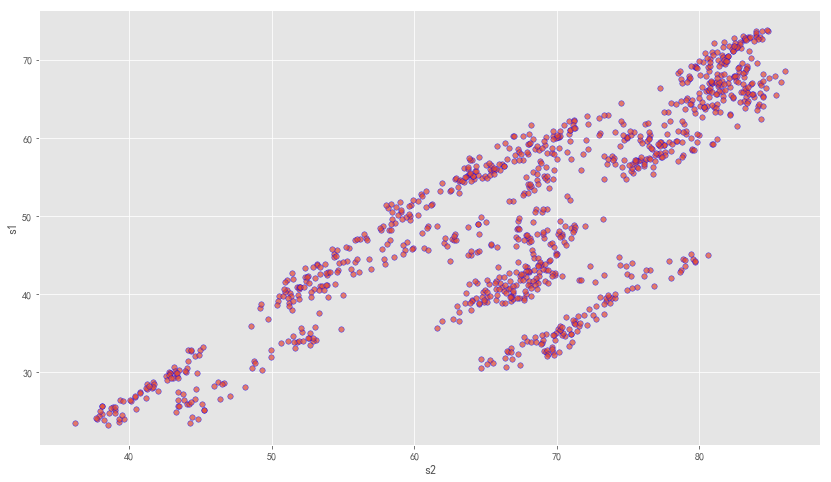

In [15]:
## Plot data with scatterplot
sc = plt.scatter(s2, s1, s=30, edgecolor='b', alpha=0.7)
plt.xlabel('s2')
plt.ylabel('s1');
plt.show()

In [16]:
print(s1)

0     48.16588759
1     48.23780192
2     49.44488484
3     49.12674759
4     50.54795658
5     50.82788076
6     51.46212193
7     50.07734879
8     50.53494975
9     51.49669589
10    51.04935462
11    51.20696803
12    51.41350424
13    51.74219652
14    51.96231797
15    52.86873520
16    52.04272888
17    53.17242704
18    52.57141079
19    51.24175920
20    53.14075897
21    54.71218807
22    54.42358571
23    53.25692593
24    54.24138775
25    54.86228087
26    56.10209518
27    57.51301399
28    57.12888803
29    57.20992401
          ...    
970   32.71264791
971   32.56003034
972   33.88213923
973   34.09229238
974   35.87008507
975   34.72820702
976   35.74359913
977   35.02954836
978   34.73521505
979   36.12990947
980   35.91941571
981   37.40399797
982   37.38805449
983   37.28375480
984   34.79684442
985   33.66472579
986   33.63965042
987   31.72014977
988   30.74232124
989   30.97298086
990   32.29725075
991   32.94480805
992   32.07986410
993   32.65950786
994   33.3

In [17]:
print(s2)

0     58.22726114
1     58.36013472
2     59.66907513
3     58.66002982
4     59.07228929
5     59.09816412
6     59.74068245
7     58.84199936
8     58.45532124
9     58.35807033
10    58.13692690
11    58.69082206
12    58.04135509
13    58.97057699
14    60.26565331
15    60.45958960
16    59.87473456
17    60.81561016
18    60.54968326
19    59.59546403
20    61.79760231
21    62.83826812
22    63.10951421
23    62.50535209
24    61.95094776
25    62.91101156
26    63.47452183
27    64.53602501
28    64.06842796
29    63.90619633
          ...    
970   66.50151185
971   66.79095715
972   68.54067329
973   69.03809568
974   70.19339916
975   68.97753683
976   70.36299685
977   69.92338215
978   69.78441364
979   71.28341511
980   71.59095710
981   73.28612839
982   72.53003290
983   71.90654217
984   69.71743374
985   68.88448453
986   67.58153217
987   66.86621101
988   66.41755755
989   67.40875380
990   69.38833975
991   69.65650604
992   69.33328823
993   70.18385841
994   70.8

In [18]:
print(s1.reshape(-1,1)[:3])

[[48.16588759]
 [48.23780192]
 [49.44488484]]


/root/anaconda2/envs/aind-dl/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


In [19]:
from sklearn.linear_model import LinearRegression

## Quiz: Linear Regression

Note that the LinearRegression().fit() expects 2D numpy arrays.  Since s1 and s2 are pandas series, we can use Series.values to get the values as a numpy array. Since these are 1D arrays, we can use numpy.reshape(-1,1) to make these 1000 row by 1 column 2 dimensional arrays.  

The coefficients of the linear regression, $\beta$ and $intercept$ for the regression line:  
$y = \beta \times x + intercept$  
Can be obtained after fitting to the data.  Use `LinearRegression.coef_` for the slope (beta coefficients) and `LinearRegression.intercept_` for the intercept.  You may want to practice accessing these outside of the function definition, to see if you'll need additional brackets `[]` to access the values.

In [23]:
def regression_slope_and_intercept(xSeries, ySeries):
    """
    xSeries: pandas series, x variable
    ySeries: pandas series, y variable
    """
    lr = LinearRegression()
    #TODO: get the values from each series, reshape to be 2 dimensional
    #set s1 to the x variable, s2 to the y variable
    xVar = xSeries.reshape(-1,1)
    yVar = ySeries.reshape(-1,1)
    
    #TODO: call LinearRegression.fit().  Pass in the x variable then y variable
    model = LinearRegression()
    model.fit(xVar,yVar)
    #TODO: obtain the slope and intercept
    slope =  model.coef_[0][0]
    intercept = model.intercept_[0]
    
    return (slope, intercept)

quiz_tests.test_regression_slope_and_intercept(regression_slope_and_intercept);

Tests Passed


/root/anaconda2/envs/aind-dl/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/root/anaconda2/envs/aind-dl/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [28]:
slope, intercept = regression_slope_and_intercept(s1,s2);
print("slope {slope} and intercept {intercept:.2f}") 

slope {slope:.2f} and intercept {intercept:.2f}


/root/anaconda2/envs/aind-dl/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/root/anaconda2/envs/aind-dl/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


### Plot the fitted regression line over the scatterplot

In [ ]:
plt.scatter(s2, s1, s=30, edgecolor='b', alpha=0.5);
x = np.linspace(s1.min()-5, s1.max()+5, 2)
yPred = slope * x + intercept
plt.plot(yPred,x, alpha=0.2, lw=3, color='r')
plt.xlabel('s2')
plt.ylabel('s1');

If you're stuck, you can also check out the solution [here](regression_solution.ipynb)